# 2.3.1 Agregando trazas

Se pueden agregar nuevos rastros a una figura de objeto gráfico mediante el método `add_trace()`. Este método acepta un rastro de objeto gráfico (una instancia de `go.Scatter`, `go.Bar`, etc.) y lo agrega a la figura. Esto le permite comenzar con una figura vacía y agregarle rastros de manera secuencial. El método `append_trace()` hace lo mismo, aunque no devuelve la figura.

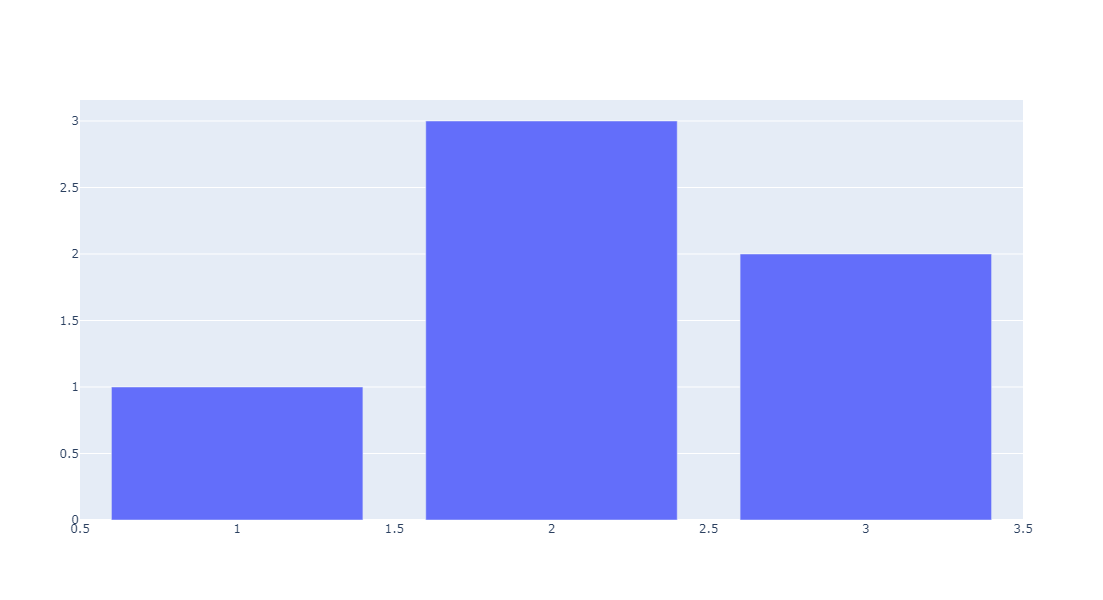

In [3]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

fig.update_layout(width=600, height=600) 
fig.show()

## En `Plotly Express`

También puedes agregar trazos a una figura producida por una `Figure Factory` o `Plotly Express`.

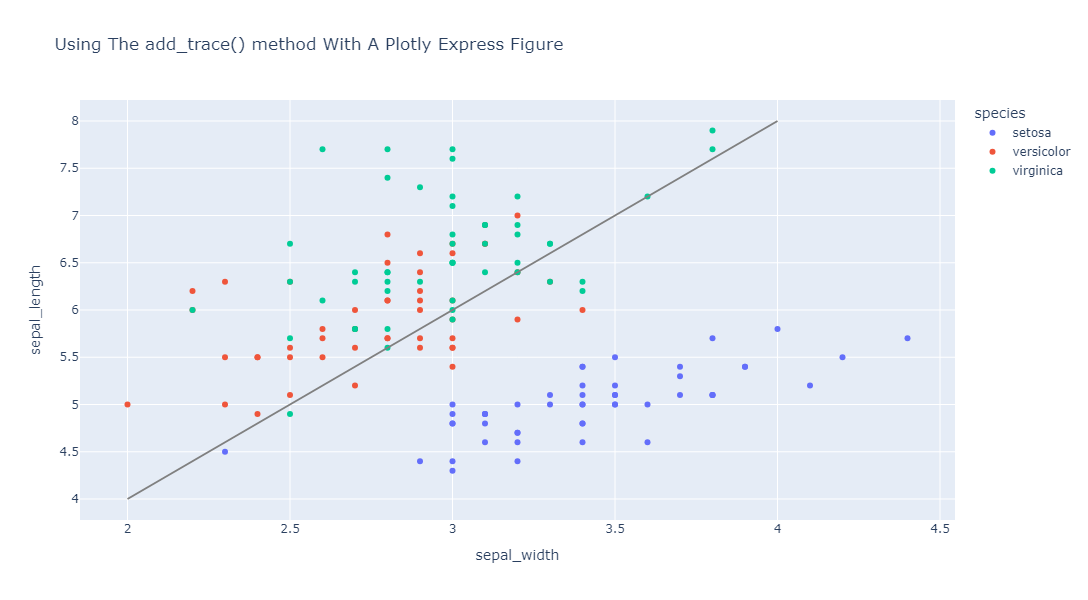

In [8]:
import plotly.express as px

df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Using The add_trace() method With A Plotly Express Figure")

fig.add_trace(
    go.Scatter(
        x=[2, 4],
        y=[4, 8],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

fig.update_layout(width=600, height=600) 
fig.show()

# 2.3.2 Agregando trazas a Subplots

Si se creó una figura usando `plotly.subplots.make_subplots()`, entonces se pueden usar los argumentos `row` y `col` para agregar un rastro a una subparcela en particular.

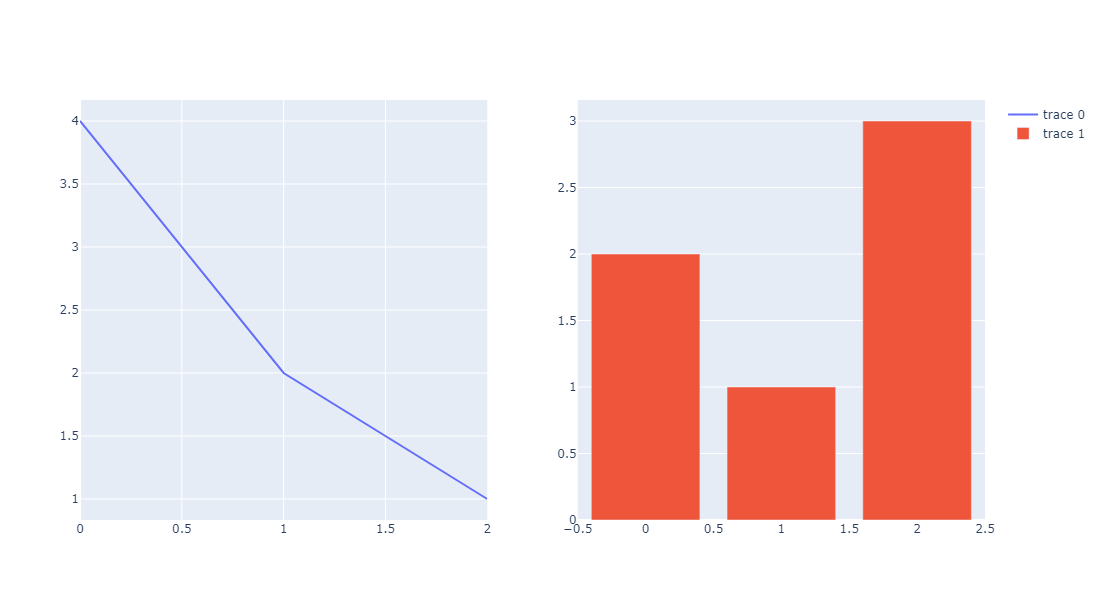

In [10]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

fig.update_layout(width=600, height=600) 
fig.show()

## En `Plotly Express`

Esto también funciona para figuras creadas por `Plotly Express` usando los argumentos `facet_row` y o `facet_col`

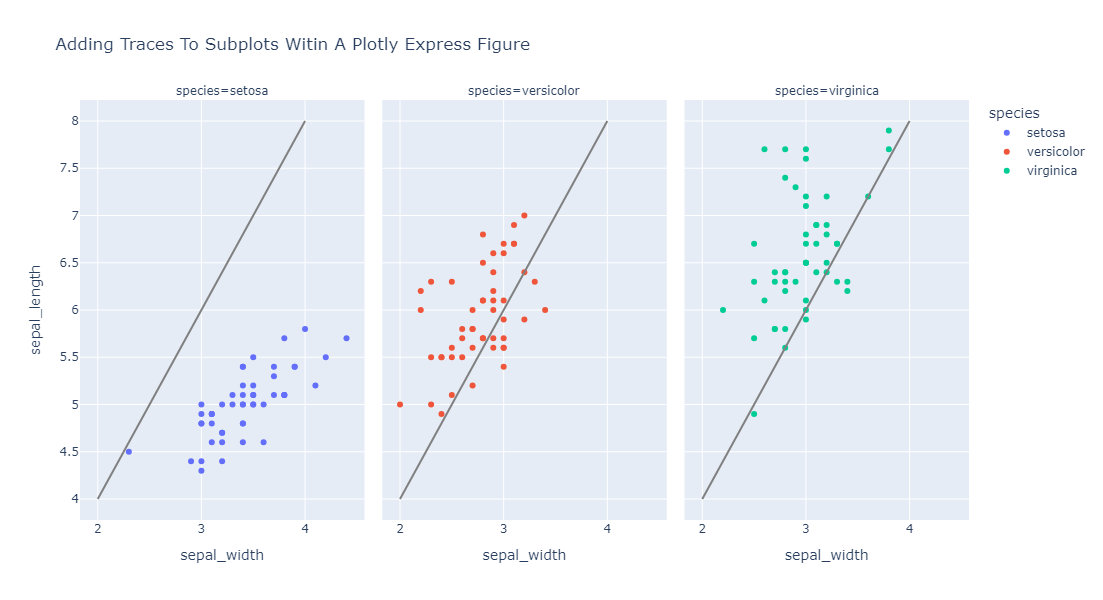

In [12]:
import plotly.express as px

df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", facet_col="species",
                 title="Adding Traces To Subplots Witin A Plotly Express Figure")

reference_line = go.Scatter(x=[2, 4],
                            y=[4, 8],
                            mode="lines",
                            line=go.scatter.Line(color="gray"),
                            showlegend=False)

fig.add_trace(reference_line, row=1, col=1)
fig.add_trace(reference_line, row=1, col=2)
fig.add_trace(reference_line, row=1, col=3)

fig.update_layout(width=600, height=600) 
fig.show()